### Dataset: Fire Incidents

In [10]:
import pandas as pd


data = pd.read_csv("Datasets/fire_incidents.csv")
data.head()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


### Metric Used: Fire Incident Frequency

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv("Datasets/fire_incidents.csv")

fire = pd.DataFrame(data)

neighborhood_counts = fire.groupby('neighborhood').size().reset_index(name='incident_count')

sorted_count = neighborhood_counts.sort_values(by='incident_count', ascending=False)

print(sorted_count)



                 neighborhood  incident_count
15                    Carrick             328
72           South Side Flats             307
16  Central Business District             304
77        Squirrel Hill South             281
38                  Hazelwood             264
..                        ...             ...
67                  Ridgemont              12
54                 Mt. Oliver              12
26              East Carnegie              11
66              Regent Square               9
52       Mount Oliver Borough               7

[91 rows x 2 columns]


Least Safe Neighborhood (Most Incidents): Carrick with 328 incidents
Best Neighborhood (Least Incidents): Mount Oliver Borough with 7 incidents


Text(0.5, 1.0, 'Fire Incidents in Pittsburgh Neighborhoods')

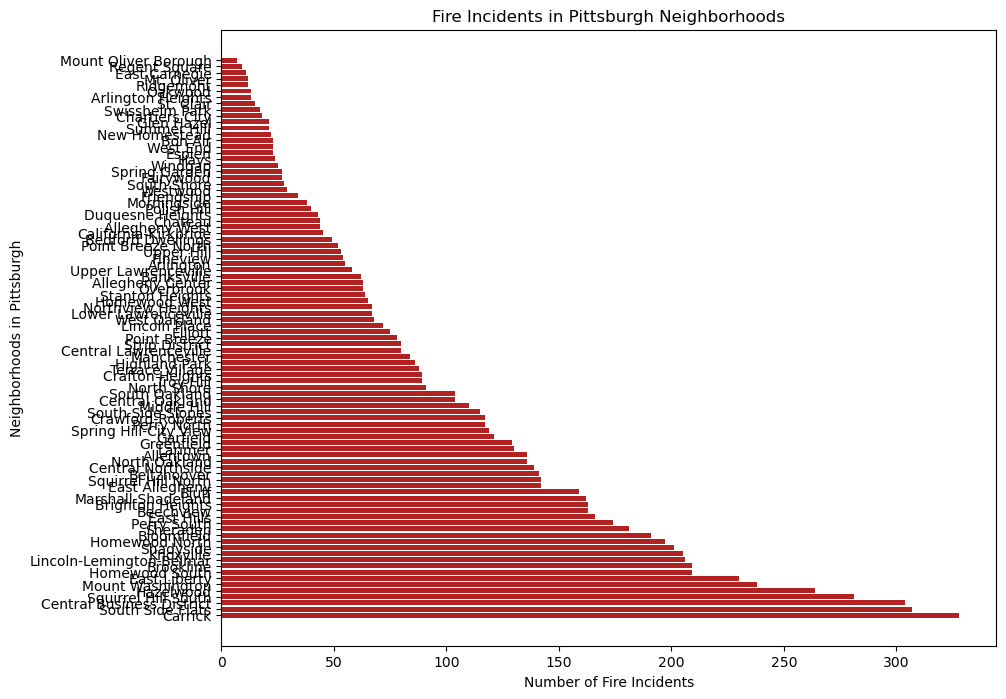

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/fire_incidents.csv")

fire = pd.DataFrame(data)

neighborhood_counts = fire.groupby('neighborhood').size().reset_index(name='incident_count')
sorted_count = neighborhood_counts.sort_values(by='incident_count', ascending=False)

least_safe_neighborhood = sorted_count.iloc[0]
print(f"Least Safe Neighborhood (Most Incidents): {least_safe_neighborhood['neighborhood']} with {least_safe_neighborhood['incident_count']} incidents")

best_neighborhood = sorted_count.iloc[-1]
print(f"Best Neighborhood (Least Incidents): {best_neighborhood['neighborhood']} with {best_neighborhood['incident_count']} incidents")


plt.figure(figsize=(10,8))
plt.barh(sorted_count["neighborhood"], sorted_count["incident_count"], color="firebrick")
plt.xlabel("Number of Fire Incidents")
plt.ylabel("Neighborhoods in Pittsburgh")
plt.title("Fire Incidents in Pittsburgh Neighborhoods")